1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
PATH = r"D:\Kì 6\Nhập môn học máy\Thực hành\Lab03\TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'AnnualIncome'}>,
        <AxesSubplot: title={'center': 'FamilyMembers'}>],
       [<AxesSubplot: title={'center': 'ChronicDiseases'}>,
        <AxesSubplot: title={'center': 'TravelInsurance'}>]], dtype=object)

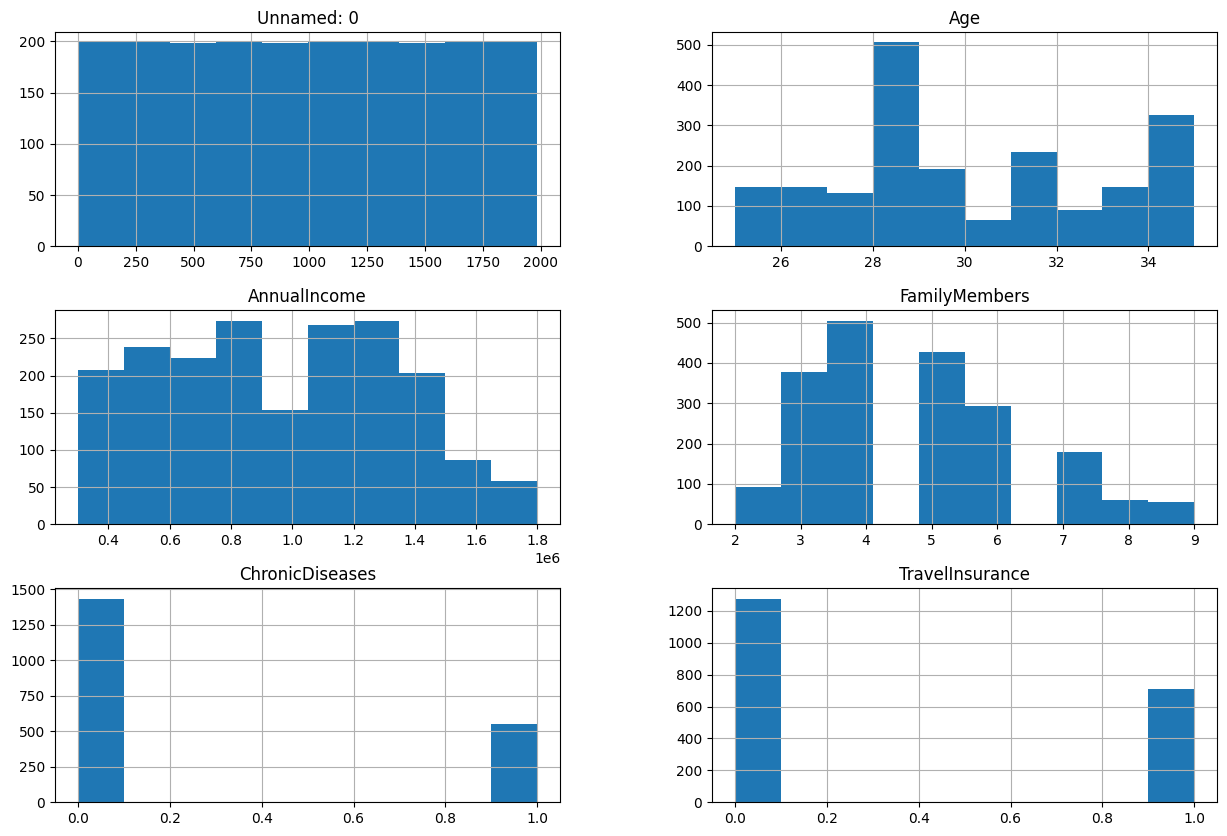

In [5]:
df.hist(figsize=(15, 10))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


## Data Analysis

In [4]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [8]:
df[categorical_cols]

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...
1982,Private Sector/Self Employed,Yes,Yes,Yes
1983,Private Sector/Self Employed,Yes,No,Yes
1984,Private Sector/Self Employed,Yes,No,No
1985,Private Sector/Self Employed,Yes,Yes,Yes


In [9]:
df[numerical_cols]

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
0,0,31,400000,6,1,0
1,1,31,1250000,7,0,0
2,2,34,500000,4,1,1
3,3,28,700000,3,1,0
4,4,28,700000,8,1,0
...,...,...,...,...,...,...
1982,1982,33,1500000,4,0,1
1983,1983,28,1750000,5,1,0
1984,1984,28,1150000,6,1,0
1985,1985,34,1000000,6,0,1


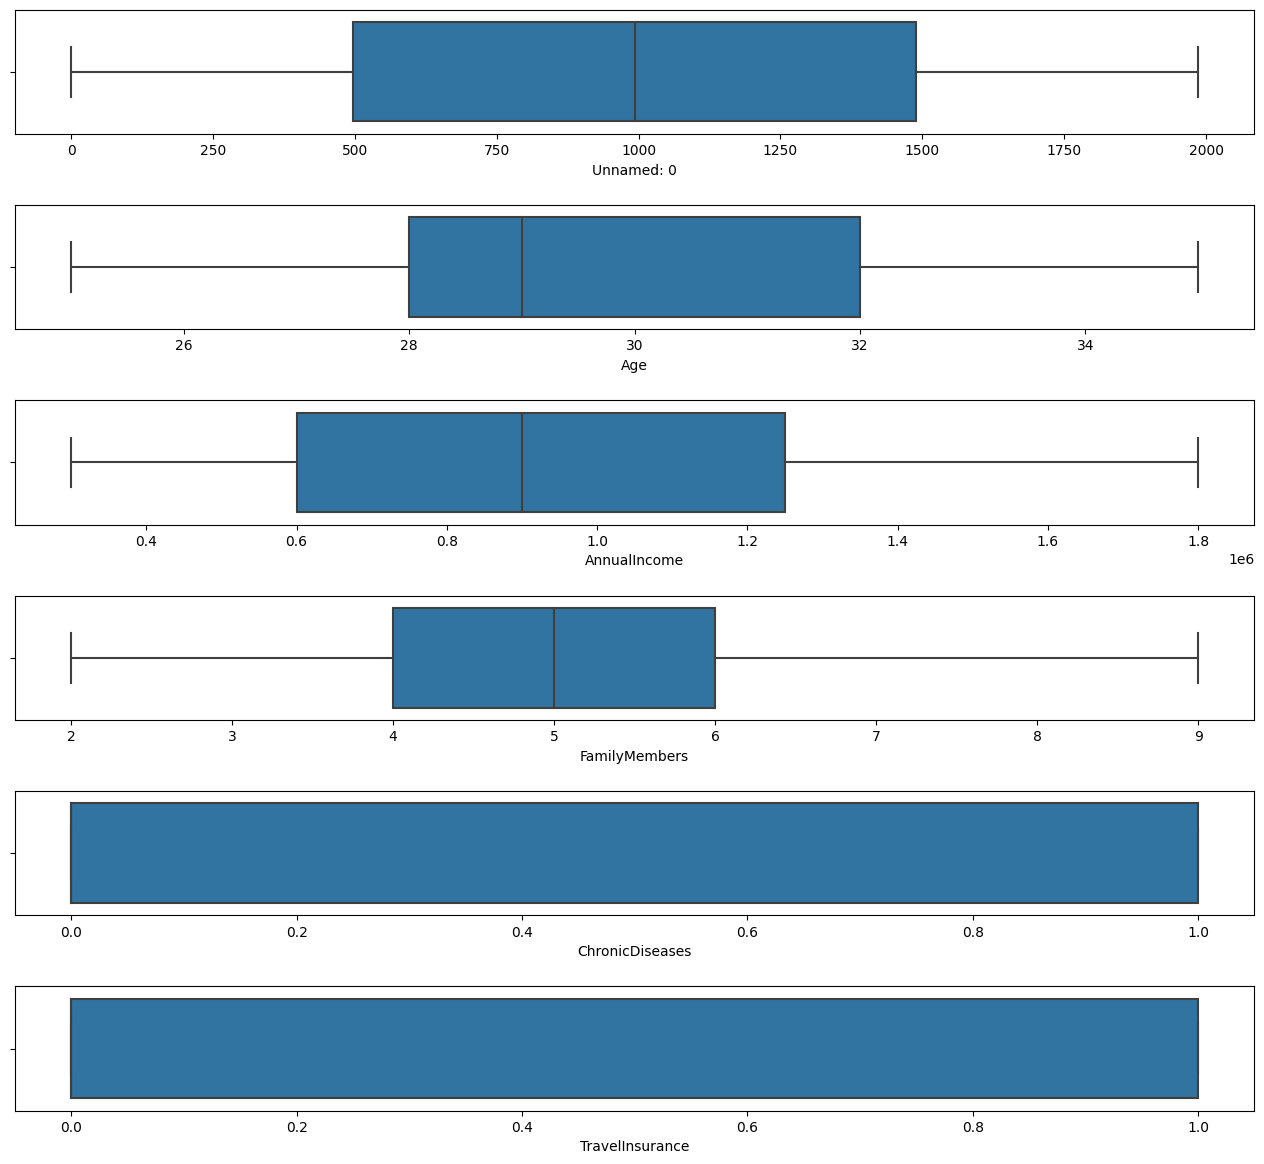

In [10]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(13, 2*len(numerical_cols)), sharex=False, sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,ax=axes[i])
plt.tight_layout(pad=2.0)

<AxesSubplot: xlabel='TravelInsurance', ylabel='count'>

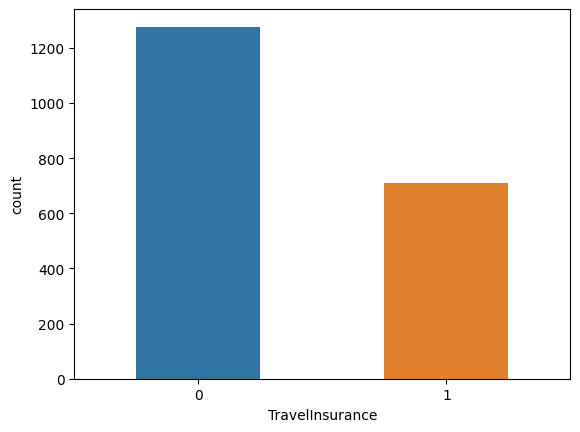

In [11]:
sns.countplot(x=df['TravelInsurance'], width=0.5)

<AxesSubplot: >

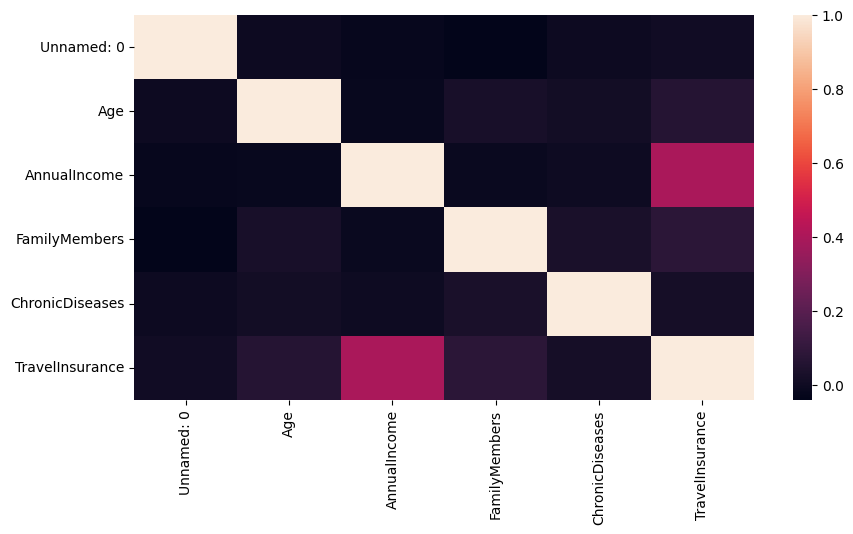

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical_cols].corr())

## Preprocessing

In [13]:
df[categorical_cols].isnull().sum()

Employment Type        0
GraduateOrNot          0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [14]:
df[numerical_cols].isnull().sum()

Unnamed: 0         0
Age                0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
TravelInsurance    0
dtype: int64

In [15]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop(df.columns[[0]], axis=1, inplace=True)
    return df

In [16]:
df = preprocessing_data(df.copy())
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## Feature Engineering

<AxesSubplot: xlabel='Employment Type', ylabel='count'>

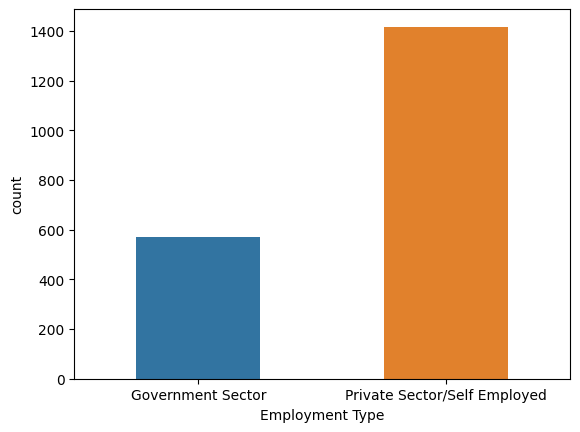

In [17]:
sns.countplot(x=df['Employment Type'], width=0.5)

<AxesSubplot: >

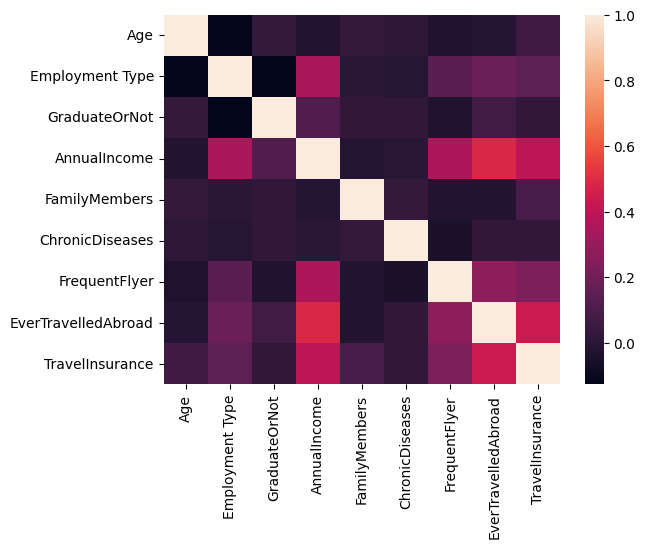

In [18]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df['Employment Type'] = df['Employment Type'].astype("category").cat.codes
    df['GraduateOrNot'] = df['GraduateOrNot'].astype("category").cat.codes
    df['FrequentFlyer'] = df['FrequentFlyer'].astype("category").cat.codes
    df['EverTravelledAbroad'] = df['EverTravelledAbroad'].astype("category").cat.codes
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [19]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    feature_names = df.columns.tolist()
    feature_names.remove("TravelInsurance")

    X = df[feature_names].values
    y = df.TravelInsurance.values
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [20]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
_trainX = pca.fit_transform(trainX)
_testX = pca.transform(testX)

model = GaussianNB()
model.fit(_trainX, trainY)
print(classification_report(testY, model.predict(_testX)))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       385
           1       0.72      0.50      0.59       212

    accuracy                           0.76       597
   macro avg       0.74      0.70      0.71       597
weighted avg       0.75      0.76      0.74       597



In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
_trainX = scaler.fit_transform(trainX)
_testX = scaler.transform(testX)

model = GaussianNB()
model.fit(_trainX, trainY)
print(classification_report(testY, model.predict(_testX)))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       385
           1       0.69      0.51      0.59       212

    accuracy                           0.75       597
   macro avg       0.73      0.69      0.70       597
weighted avg       0.74      0.75      0.74       597



In [40]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    scaler = MinMaxScaler()
    pca = PCA()
    model = GaussianNB()

    pipe = Pipeline(steps=[
        ("scaler", scaler),
        ("model", model)
    ])
    
    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'model__var_smoothing': var_smoothing_values
        }

    search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=2)
    search.fit(trainX, trainY)
    print("Best score : ", search.best_score_)
    print("Best parameter : ", search.best_params_)

    return search

model = build_model(trainX, trainY)
pred = model.predict(testX)
print(classification_report(testY, pred))

Best score :  0.5301414141414141
Best parameter :  {'model__var_smoothing': 0.0001, 'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       385
           1       0.69      0.51      0.59       212

    accuracy                           0.75       597
   macro avg       0.73      0.69      0.70       597
weighted avg       0.74      0.75      0.74       597



In [41]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Chọn recall vì đậy là bộ dữ liệu dựa trên thông tin để biết khách hàng nào muốn mua bảo hiểm du lịch  "\
            "Recall càng cao thì tỉ lệ bỏ sót những người muốn mua bảo hiểm càng thấp "\
            "Recall thấp : Nhận nhầm người muốn mua bảo hiểm thành người không muốn mua dẫn đến mất đi một lượng khách hàng"\
            "Vì tập dữ liệu có ít feature nên việc giảm chiều dữ liệu sẽ làm giảm Recall"